In [2]:
#imports
from nltk.corpus import stopwords
from wordcloud import WordCloud
from textblob import TextBlob
import matplotlib.pyplot as plt
import neattext as ntx
import pandas as pd
from collections import Counter
import numpy as np
import itertools
import string
import nltk
import re
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/vilorial/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/vilorial/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
#reading .csv file and getting the first 5 data from the file
df = pd.read_csv('vaccination_all_tweets.csv')
df.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False


In [4]:
#getting the last 5 data from the file
df.tail()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
228202,1460170772299665408,VaxBLR,"Bengaluru, India",Hourly updates on FREE and PAID 18+ and 45+ va...,2021-06-21 08:44:34,31,0,0,False,2021-11-15 09:00:15,45+ #URBAN #Bengaluru #CovidVaccine Availabili...,"['URBAN', 'Bengaluru', 'CovidVaccine', 'COVISH...",VaxBlr,0,0,False
228203,1460163268262051841,VaxBLR,"Bengaluru, India",Hourly updates on FREE and PAID 18+ and 45+ va...,2021-06-21 08:44:34,31,0,0,False,2021-11-15 08:30:26,18-44 #BBMP #Bengaluru #CovidVaccine Availabil...,"['BBMP', 'Bengaluru', 'CovidVaccine', 'COVISHI...",VaxBlr,0,1,False
228204,1460163224221851655,VaxBLR,"Bengaluru, India",Hourly updates on FREE and PAID 18+ and 45+ va...,2021-06-21 08:44:34,31,0,0,False,2021-11-15 08:30:15,18-44 #URBAN #Bengaluru #CovidVaccine Availabi...,"['URBAN', 'Bengaluru', 'CovidVaccine', 'COVISH...",VaxBlr,0,0,False
228205,1460156376995573765,Gatti Valentino🐾,Southern Africa,"Entrepreneur, self taught cook🍲🌮 @Chelsea @Fer...",2019-08-28 10:31:43,8103,3113,45726,False,2021-11-15 08:03:03,They promote their Vaccines leaving out the st...,['SputnikV'],Twitter for Android,0,0,False
228206,1460155671140134912,VaxBLR,"Bengaluru, India",Hourly updates on FREE and PAID 18+ and 45+ va...,2021-06-21 08:44:34,31,0,0,False,2021-11-15 08:00:15,45+ #URBAN #Bengaluru #CovidVaccine Availabili...,"['URBAN', 'Bengaluru', 'CovidVaccine', 'COVISH...",VaxBlr,0,0,False


In [5]:
#getting the dataset's array dimension
df.shape

(228207, 16)

In [6]:
#getting the descriptive statistics of the file
df.describe()

,id,user_followers,user_friends,user_favourites,retweets,favorites
count,2.282070e+05,2.282070e+05,228207.000000,2.282070e+05,228207.000000,228207.000000
mean,1.407541e+18,9.605393e+04,986.736204,1.210417e+04,2.489284,10.819020
std,2.908485e+16,8.389053e+05,5293.500468,3.908233e+04,51.079821,199.527693
min,1.337728e+18,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000
25%,1.381940e+18,5.500000e+01,27.000000,5.700000e+01,0.000000,0.000000
50%,1.408133e+18,3.280000e+02,229.000000,9.960000e+02,0.000000,0.000000
75%,1.428688e+18,1.521000e+03,794.000000,7.300000e+03,1.000000,2.000000
max,1.463251e+18,1.635305e+07,582461.000000,1.299600e+06,12294.000000,54017.000000


In [7]:
#getting the sum of all the values
df.isnull().sum()

id                      0
user_name               2
user_location       66911
user_description    17018
user_created            0
user_followers          0
user_friends            0
user_favourites         0
user_verified           0
date                    0
text                    0
hashtags            49703
source                119
retweets                0
favorites               0
is_retweet              0
dtype: int64

In [8]:
#setting akll text to lower case
dt = df
#lowercase
df['text'] = df['text'].str.lower()
df['text']

0         same folks said daikon paste could treat a cyt...
1         while the world has been on the wrong side of ...
2         #coronavirus #sputnikv #astrazeneca #pfizerbio...
3         facts are immutable, senator, even when you're...
4         explain to me again why we need a vaccine @bor...
                                ...                        
228202    45+ #urban #bengaluru #covidvaccine availabili...
228203    18-44 #bbmp #bengaluru #covidvaccine availabil...
228204    18-44 #urban #bengaluru #covidvaccine availabi...
228205    they promote their vaccines leaving out the st...
228206    45+ #urban #bengaluru #covidvaccine availabili...
Name: text, Length: 228207, dtype: object

In [9]:
#removing url
df['text'] = df['text'].apply(lambda x:re.sub('http\S+', '', str(x)))
df['text']

0         same folks said daikon paste could treat a cyt...
1         while the world has been on the wrong side of ...
2         #coronavirus #sputnikv #astrazeneca #pfizerbio...
3         facts are immutable, senator, even when you're...
4         explain to me again why we need a vaccine @bor...
                                ...                        
228202    45+ #urban #bengaluru #covidvaccine availabili...
228203    18-44 #bbmp #bengaluru #covidvaccine availabil...
228204    18-44 #urban #bengaluru #covidvaccine availabi...
228205    they promote their vaccines leaving out the st...
228206    45+ #urban #bengaluru #covidvaccine availabili...
Name: text, Length: 228207, dtype: object

In [10]:
#removing punctuation
def remove_punctuation(text):
    punc = string.punctuation
    return text.translate(str.maketrans('','', punc))

In [11]:
df['text'] = df['text'].apply(lambda text: remove_punctuation(text))
df['text']

0         same folks said daikon paste could treat a cyt...
1         while the world has been on the wrong side of ...
2         coronavirus sputnikv astrazeneca pfizerbiontec...
3         facts are immutable senator even when youre no...
4         explain to me again why we need a vaccine bori...
                                ...                        
228202    45 urban bengaluru covidvaccine availability f...
228203    1844 bbmp bengaluru covidvaccine availability ...
228204    1844 urban bengaluru covidvaccine availability...
228205    they promote their vaccines leaving out the st...
228206    45 urban bengaluru covidvaccine availability f...
Name: text, Length: 228207, dtype: object

Text(0, 0.5, 'Number of users')

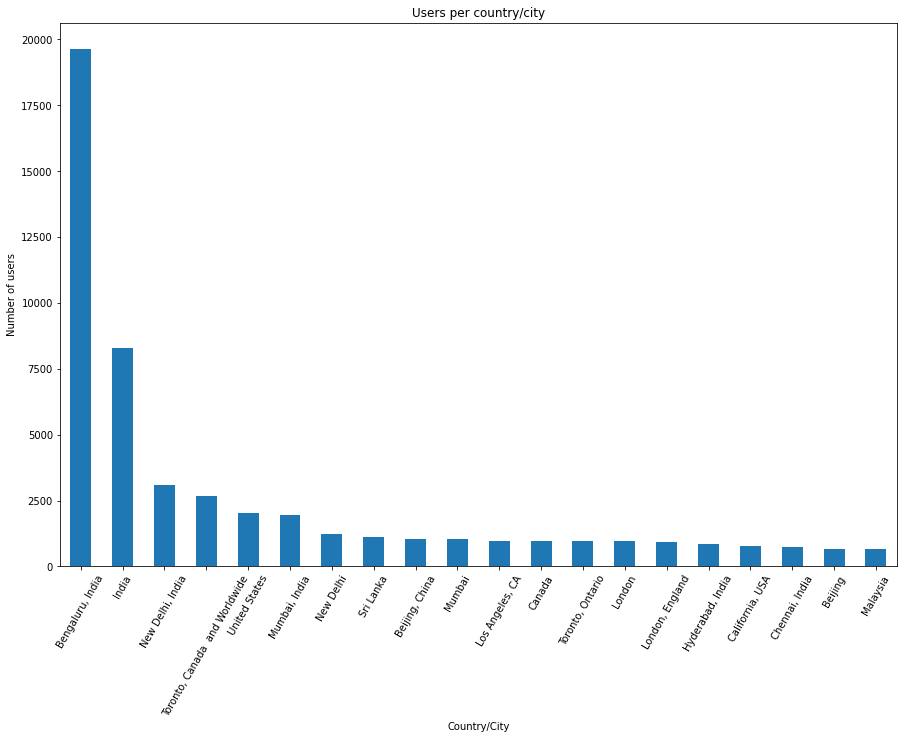

In [12]:
#visualizing tweet count per location bar graph
plt.figure(figsize = (15,10))
df['user_location'].value_counts().nlargest(20).plot(kind = 'bar')
plt.xticks(rotation = 60)
plt.title('Users per country/city')
plt.xlabel('Country/City')
plt.ylabel('Number of users')

Text(0.5, 1.0, 'Users per Country/City')

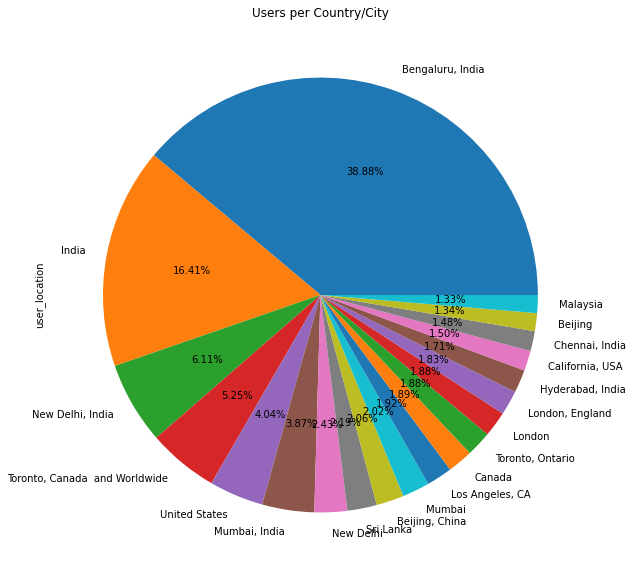

In [13]:
#visualizing tweet count per location pie graph
label = df['user_location'].value_counts().nlargest(20).plot.pie(y = 'User Locations', figsize = (15,10), autopct = '%1.2f%%')
plt.title('Users per Country/City')

In [14]:
#removing duplicate rows
df = df.drop_duplicates('text')
df.shape

(214435, 16)

In [15]:
df.source.value_counts()

Twitter for Android    55517
Twitter Web App        53995
Twitter for iPhone     47430
CowinAlertsBot         10644
cowin_vaccine_app      10202
                       ...  
Statusbrew                 1
SGMattersWeb               1
boc.vip                    1
SocialOomph                1
TrialStat-WP2Twtr          1
Name: source, Length: 368, dtype: int64

(array([], dtype=float64), [])

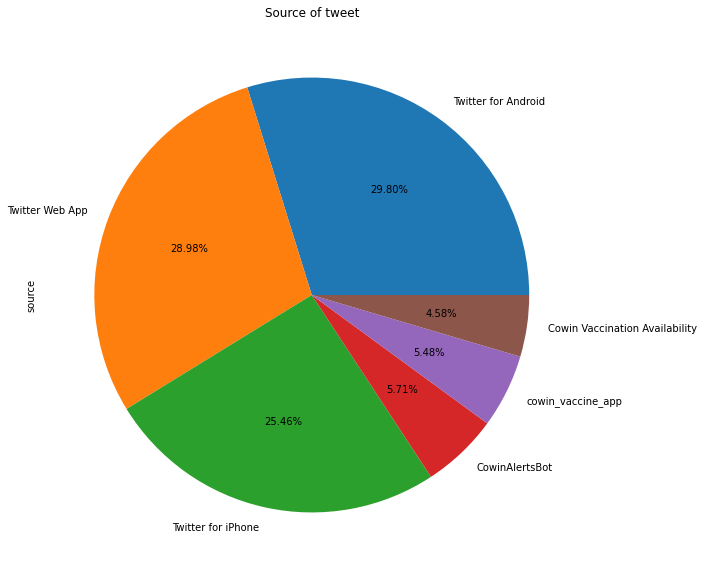

In [16]:
#visualizing Tweet Platform-wise Distribution
plt.figure(figsize =(15,10))
# df['source'].value_counts().nlargest(6).plot(kind= 'bar')
label3 = df['source'].value_counts().nlargest(6).plot.pie(y = 'Source of Tweet', figsize = (15,10), autopct = '%1.2f%%')
plt.title('Source of tweet')
plt.xticks(rotation = 80)

In [17]:
#getting unique dates and sorting data in ascending order
len(df['date'].unique())
df.sort_values(by=['date'], ascending=[True]).head(2)

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
44,1337727767551553536,Daily News Egypt,Egypt,Egypt's Only Daily Independent Newspaper in En...,2009-04-26 07:56:24,278080,116,765,True,2020-12-12 11:55:28,fda authorizes pfizerbiontech coronavirus vacc...,"['FDA', 'PfizerBioNTech', 'coronavirus']",Twitter Web App,1,1,False
42,1337732077278662657,mystic,NaN,I believe in the goodness of humanity.,2020-05-20 10:57:00,14,162,1341,False,2020-12-12 12:12:35,covidvaccine pfizerbiontech covid19 pfizerbion...,"['CovidVaccine', 'Pfizer', 'PfizerBioNTech', '...",Twitter for iPhone,0,1,False


In [18]:
#dropping unnecessary columns
df.drop(columns={'id', 'user_name', 'user_description', 'user_created', 'user_followers', 'user_friends', 'user_favourites', 'user_verified', 'retweets', 'favorites', 'is_retweet'}, inplace=True)

/home/vilorial/.local/lib/python3.8/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [19]:
pd.set_option('display.max_colwidth', 700)
df.head()

,user_location,date,text,hashtags,source
0,"La Crescenta-Montrose, CA",2020-12-20 06:06:44,same folks said daikon paste could treat a cytokine storm pfizerbiontech,['PfizerBioNTech'],Twitter for Android
1,"San Francisco, CA",2020-12-13 16:27:13,while the world has been on the wrong side of history this year hopefully the biggest vaccination effort weve ev…,NaN,Twitter Web App
2,Your Bed,2020-12-12 20:33:45,coronavirus sputnikv astrazeneca pfizerbiontech moderna covid19 russian vaccine is created to last 24 years…,"['coronavirus', 'SputnikV', 'AstraZeneca', 'PfizerBioNTech', 'Moderna', 'Covid_19']",Twitter for Android
3,"Vancouver, BC - Canada",2020-12-12 20:23:59,facts are immutable senator even when youre not ethically sturdy enough to acknowledge them 1 you were born i…,NaN,Twitter Web App
4,NaN,2020-12-12 20:17:19,explain to me again why we need a vaccine borisjohnson matthancock whereareallthesickpeople pfizerbiontech…,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone


In [20]:
#cleaning data using neattext
df['clean_text'] = df['text'].apply(ntx.remove_hashtags)
df['clean_text'] = df['clean_text'].apply(ntx.remove_urls)
df['clean_text'] = df['clean_text'].apply(ntx.remove_userhandles)
df['clean_text'] = df['clean_text'].apply(ntx.remove_multiple_spaces)
df['clean_text'] = df['clean_text'].apply(ntx.remove_special_characters)

/tmp/ipykernel_1273/1825691096.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clean_text'] = df['text'].apply(ntx.remove_hashtags)
/tmp/ipykernel_1273/1825691096.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clean_text'] = df['clean_text'].apply(ntx.remove_urls)
/tmp/ipykernel_1273/1825691096.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:

In [21]:
df[['clean_text', 'text']].head()

,clean_text,text
0,same folks said daikon paste could treat a cytokine storm pfizerbiontech,same folks said daikon paste could treat a cytokine storm pfizerbiontech
1,while the world has been on the wrong side of history this year hopefully the biggest vaccination effort weve ev,while the world has been on the wrong side of history this year hopefully the biggest vaccination effort weve ev…
2,coronavirus sputnikv astrazeneca pfizerbiontech moderna covid19 russian vaccine is created to last 24 years,coronavirus sputnikv astrazeneca pfizerbiontech moderna covid19 russian vaccine is created to last 24 years…
3,facts are immutable senator even when youre not ethically sturdy enough to acknowledge them 1 you were born i,facts are immutable senator even when youre not ethically sturdy enough to acknowledge them 1 you were born i…
4,explain to me again why we need a vaccine borisjohnson matthancock whereareallthesickpeople pfizerbiontech,explain to me again why we need a vaccine borisjohnson matthancock whereareallthesickpeople pfizerbiontech…


In [22]:
#stopwords are the words which won't bring about any changes
stop_words = stopwords.words('english')
len(stop_words),stop_words[:9]

(179, ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you'])

In [23]:
#removing stopwords
def stopwords_remover(tweet):
    clean_tweet = tweet
    clean_tweet = ' '.join(word for word in clean_tweet.split() if word not in stop_words)
    return clean_tweet

In [24]:
df['clean_text'] = df['clean_text'].apply(lambda x: stopwords_remover(x))
df.head()

/tmp/ipykernel_1273/361328661.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clean_text'] = df['clean_text'].apply(lambda x: stopwords_remover(x))


,user_location,date,text,hashtags,source,clean_text
0,"La Crescenta-Montrose, CA",2020-12-20 06:06:44,same folks said daikon paste could treat a cytokine storm pfizerbiontech,['PfizerBioNTech'],Twitter for Android,folks said daikon paste could treat cytokine storm pfizerbiontech
1,"San Francisco, CA",2020-12-13 16:27:13,while the world has been on the wrong side of history this year hopefully the biggest vaccination effort weve ev…,NaN,Twitter Web App,world wrong side history year hopefully biggest vaccination effort weve ev
2,Your Bed,2020-12-12 20:33:45,coronavirus sputnikv astrazeneca pfizerbiontech moderna covid19 russian vaccine is created to last 24 years…,"['coronavirus', 'SputnikV', 'AstraZeneca', 'PfizerBioNTech', 'Moderna', 'Covid_19']",Twitter for Android,coronavirus sputnikv astrazeneca pfizerbiontech moderna covid19 russian vaccine created last 24 years
3,"Vancouver, BC - Canada",2020-12-12 20:23:59,facts are immutable senator even when youre not ethically sturdy enough to acknowledge them 1 you were born i…,NaN,Twitter Web App,facts immutable senator even youre ethically sturdy enough acknowledge 1 born
4,NaN,2020-12-12 20:17:19,explain to me again why we need a vaccine borisjohnson matthancock whereareallthesickpeople pfizerbiontech…,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,explain need vaccine borisjohnson matthancock whereareallthesickpeople pfizerbiontech


In [25]:
#assigning polarity and subjectivity to the tweets
def text_blob(text):
    text_sentiment = TextBlob(text)
    sentiment_pol = text_sentiment.sentiment.polarity
    sentiment_sub = text_sentiment.sentiment.subjectivity

    if sentiment_pol > 0:
        r = 'Positive'
    elif sentiment_pol < 0:
        r = 'Negative'
    elif sentiment_pol == 0:
        r = 'Neutral'
    
    sentiment_result = {'polarity': sentiment_pol, 'subjectivity': sentiment_sub, 'sentiment': r}

    return sentiment_result

In [26]:
#testing the function
text_blob(df['clean_text'][21])


{'polarity': 0.0, 'subjectivity': 0.0, 'sentiment': 'Neutral'}

In [27]:
text_blob('Awesome I got some food!')

{'polarity': 1.0, 'subjectivity': 1.0, 'sentiment': 'Positive'}

In [28]:
#applying the text_blob function to all clean data
df['sent_results'] = df['clean_text'].apply(text_blob)

/tmp/ipykernel_1273/4237369549.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sent_results'] = df['clean_text'].apply(text_blob)


In [29]:
df.drop(columns={'text'}, inplace=True)

/home/vilorial/.local/lib/python3.8/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [30]:
df.head()

,user_location,date,hashtags,source,clean_text,sent_results
0,"La Crescenta-Montrose, CA",2020-12-20 06:06:44,['PfizerBioNTech'],Twitter for Android,folks said daikon paste could treat cytokine storm pfizerbiontech,"{'polarity': 0.0, 'subjectivity': 0.0, 'sentiment': 'Neutral'}"
1,"San Francisco, CA",2020-12-13 16:27:13,NaN,Twitter Web App,world wrong side history year hopefully biggest vaccination effort weve ev,"{'polarity': -0.5, 'subjectivity': 0.9, 'sentiment': 'Negative'}"
2,Your Bed,2020-12-12 20:33:45,"['coronavirus', 'SputnikV', 'AstraZeneca', 'PfizerBioNTech', 'Moderna', 'Covid_19']",Twitter for Android,coronavirus sputnikv astrazeneca pfizerbiontech moderna covid19 russian vaccine created last 24 years,"{'polarity': 0.0, 'subjectivity': 0.03333333333333333, 'sentiment': 'Neutral'}"
3,"Vancouver, BC - Canada",2020-12-12 20:23:59,NaN,Twitter Web App,facts immutable senator even youre ethically sturdy enough acknowledge 1 born,"{'polarity': 0.1, 'subjectivity': 0.55, 'sentiment': 'Positive'}"
4,NaN,2020-12-12 20:17:19,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,explain need vaccine borisjohnson matthancock whereareallthesickpeople pfizerbiontech,"{'polarity': 0.0, 'subjectivity': 0.0, 'sentiment': 'Neutral'}"


In [31]:
updated_data = df.join(pd.json_normalize(data=df['sent_results']))

In [32]:
updated_data.head()

,user_location,date,hashtags,source,clean_text,sent_results,polarity,subjectivity,sentiment
0,"La Crescenta-Montrose, CA",2020-12-20 06:06:44,['PfizerBioNTech'],Twitter for Android,folks said daikon paste could treat cytokine storm pfizerbiontech,"{'polarity': 0.0, 'subjectivity': 0.0, 'sentiment': 'Neutral'}",0.0,0.000000,Neutral
1,"San Francisco, CA",2020-12-13 16:27:13,NaN,Twitter Web App,world wrong side history year hopefully biggest vaccination effort weve ev,"{'polarity': -0.5, 'subjectivity': 0.9, 'sentiment': 'Negative'}",-0.5,0.900000,Negative
2,Your Bed,2020-12-12 20:33:45,"['coronavirus', 'SputnikV', 'AstraZeneca', 'PfizerBioNTech', 'Moderna', 'Covid_19']",Twitter for Android,coronavirus sputnikv astrazeneca pfizerbiontech moderna covid19 russian vaccine created last 24 years,"{'polarity': 0.0, 'subjectivity': 0.03333333333333333, 'sentiment': 'Neutral'}",0.0,0.033333,Neutral
3,"Vancouver, BC - Canada",2020-12-12 20:23:59,NaN,Twitter Web App,facts immutable senator even youre ethically sturdy enough acknowledge 1 born,"{'polarity': 0.1, 'subjectivity': 0.55, 'sentiment': 'Positive'}",0.1,0.550000,Positive
4,NaN,2020-12-12 20:17:19,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,explain need vaccine borisjohnson matthancock whereareallthesickpeople pfizerbiontech,"{'polarity': 0.0, 'subjectivity': 0.0, 'sentiment': 'Neutral'}",0.0,0.000000,Neutral


In [33]:
#categorizing tweets into separate series for easy access for each sentiment
pos_tweet = updated_data[updated_data['sentiment'] == 'Positive']['clean_text']
neg_tweet = updated_data[updated_data['sentiment'] == 'Negative']['clean_text']
neu_tweet = updated_data[updated_data['sentiment'] == 'Neutral']['clean_text']

In [34]:
#breaking down tweet word for word and sort it to right sentiments
pos_words = [word for line in pos_tweet for word in line.split()]
neg_words = [word for line in neg_tweet for word in line.split()]
neu_words = [word for line in neu_tweet for word in line.split()]

In [35]:
#getting the most used words
def get_max_token_words(tweets, num = 50):
    token_words = Counter(tweets)
    max_common_words = token_words.most_common(num)
    return dict(max_common_words)

In [36]:
#creating graphs for the sentiments
def data_figs(x, sent):
    data = pd.DataFrame(get_max_token_words(x).items(), columns=['words', 'counts'])
    fg= data.plot(kind = 'bar', x = 'words')
    plt.title(sent)
    plt.ylabel('word count')
    return fg

In [37]:
#create cloudwords
def word_cloud(tweet, sent):
    word = ' '.join([i for i in tweet])
    cloud = WordCloud(width = 1000, height = 500, random_state = 20, max_font_size = 120).generate(word)
    plt.imshow(cloud, interpolation='bilinear')
    plt.title(sent)
    plt.axis('off')
    plt.show()
    plt.figure(figsize=(12,6))

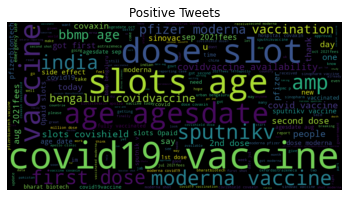

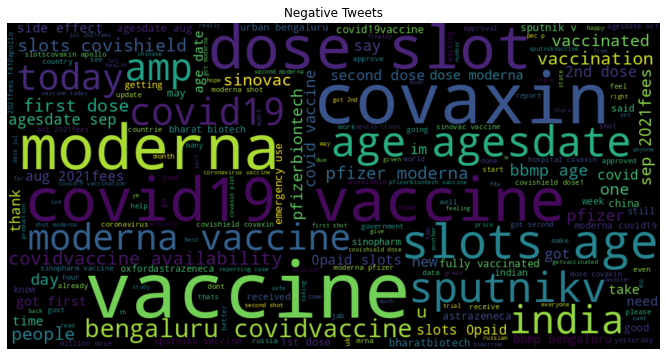

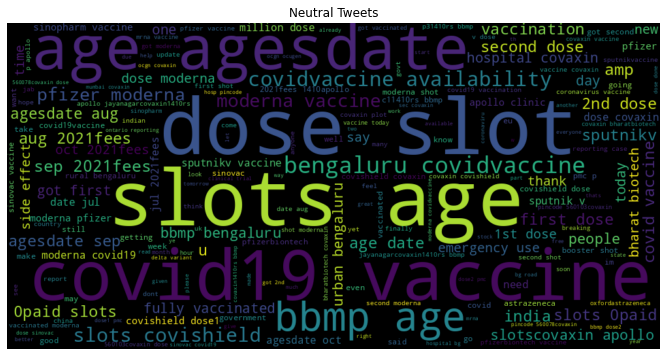

<Figure size 864x432 with 0 Axes>

In [38]:
word_cloud(pos_tweet, 'Positive Tweets')
word_cloud(neg_tweet, 'Negative Tweets')
word_cloud(neu_tweet, 'Neutral Tweets')

<AxesSubplot:title={'center':'Neutral Tweets'}, xlabel='words', ylabel='word count'>

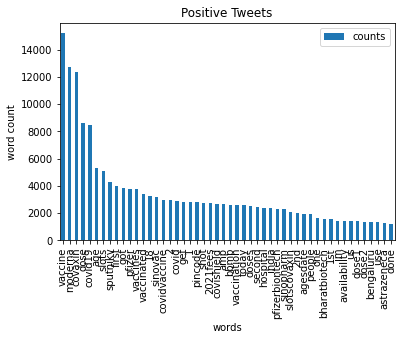

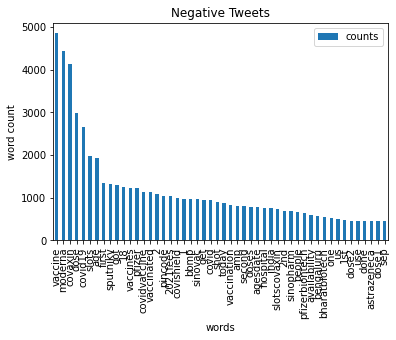

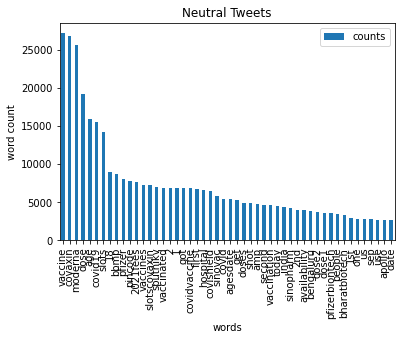

In [39]:
data_figs(pos_words, 'Positive Tweets')
data_figs(neg_words, 'Negative Tweets')
data_figs(neu_words, 'Neutral Tweets')

In [40]:
#getting the percentage of each sentiment
def sent_percent(x,sent):
    return print('The percentage of '+ sent + ' tweets: ', round(len(x)/updated_data.shape[0]*100,3), '%')

In [41]:
sent_percent(pos_tweet, 'positive')
sent_percent(neg_tweet, 'negative')
sent_percent(neu_tweet, 'neutral')

The percentage of positive tweets:  27.938 %
The percentage of negative tweets:  9.28 %
The percentage of neutral tweets:  56.752 %


Text(0.5, 1.0, 'Total Number of Sentiment about COVID-19 Vaccines')

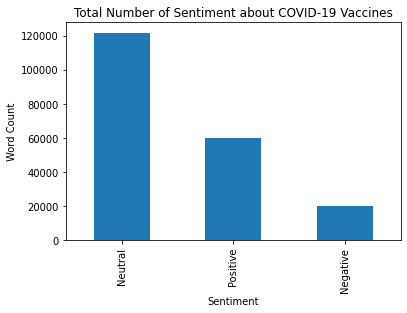

In [42]:
updated_data['sentiment'].value_counts().plot(kind = 'bar')
plt.ylabel('Word Count')
plt.xlabel('Sentiment')
plt.title("Total Number of Sentiment about COVID-19 Vaccines")

In [43]:
#checking current columns
updated_data.columns

Index(['user_location', 'date', 'hashtags', 'source', 'clean_text',
       'sent_results', 'polarity', 'subjectivity', 'sentiment'],
      dtype='object')

In [44]:
#dropping unnecessary columns
updated_data2 = updated_data.drop(columns = 'sent_results')
updated_data2.head()

,user_location,date,hashtags,source,clean_text,polarity,subjectivity,sentiment
0,"La Crescenta-Montrose, CA",2020-12-20 06:06:44,['PfizerBioNTech'],Twitter for Android,folks said daikon paste could treat cytokine storm pfizerbiontech,0.0,0.000000,Neutral
1,"San Francisco, CA",2020-12-13 16:27:13,NaN,Twitter Web App,world wrong side history year hopefully biggest vaccination effort weve ev,-0.5,0.900000,Negative
2,Your Bed,2020-12-12 20:33:45,"['coronavirus', 'SputnikV', 'AstraZeneca', 'PfizerBioNTech', 'Moderna', 'Covid_19']",Twitter for Android,coronavirus sputnikv astrazeneca pfizerbiontech moderna covid19 russian vaccine created last 24 years,0.0,0.033333,Neutral
3,"Vancouver, BC - Canada",2020-12-12 20:23:59,NaN,Twitter Web App,facts immutable senator even youre ethically sturdy enough acknowledge 1 born,0.1,0.550000,Positive
4,NaN,2020-12-12 20:17:19,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,explain need vaccine borisjohnson matthancock whereareallthesickpeople pfizerbiontech,0.0,0.000000,Neutral


In [45]:
#creating references for vaccines
pfizer = ['Pfizer','pfizer','PfizerBioNTech','pfizer-bioNtech','BioNTech','biontech']
covaxin = ['covax','covaxin','Covax','Covaxin','Bharat Biotech','bharat biotech','BharatBiotech','bharatbiotech']
sinopharm =['sinopharm', 'SinoPharm', 'Sinopharm']
sputnik = ['russia','sputnik','Sputnik', 'V', 'Sputnik V']
astra = ['sii','SII','adar poonawalla','Covishield','covishield','astra','zenca','Oxford–AstraZeneca','astrazenca','oxford-astrazenca','serum institiute']
moderna = ['moderna','Moderna','mRNA-1273','Spikevax']
sinovac = ['Sinovac', 'sinovac', 'sinovacbiotech', 'sinovacph']

In [46]:
def vaccine_reference(tweet, reference):
    ref_count = 0
    for i in reference:
        if tweet.find(i) != -1:
            ref_count = 1
    return ref_count

In [47]:
updated_data2['pfizer'] = updated_data2['clean_text'].apply(lambda x: vaccine_reference(x, pfizer))
updated_data2['covaxin'] = updated_data2['clean_text'].apply(lambda x: vaccine_reference(x, covaxin))
updated_data2['sinopharm'] = updated_data2['clean_text'].apply(lambda x: vaccine_reference(x, sinopharm))
updated_data2['sputnik'] = updated_data2['clean_text'].apply(lambda x: vaccine_reference(x, sputnik))
updated_data2['astra'] = updated_data2['clean_text'].apply(lambda x: vaccine_reference(x, astra))
updated_data2['moderna'] = updated_data2['clean_text'].apply(lambda x: vaccine_reference(x, moderna))
updated_data2['sinovac'] = updated_data2['clean_text'].apply(lambda x: vaccine_reference(x, sinovac))

In [48]:
#displaying data per vaccine
display(updated_data2.pfizer.value_counts(), updated_data2.covaxin.value_counts(), updated_data2.sinopharm.value_counts(), updated_data2.sputnik.value_counts(), updated_data2.astra.value_counts(), updated_data2.moderna.value_counts(), updated_data2.sinovac.value_counts())

0    192736
1     21699
Name: pfizer, dtype: int64

0    143946
1     70489
Name: covaxin, dtype: int64

0    206849
1      7586
Name: sinopharm, dtype: int64

0    196384
1     18051
Name: sputnik, dtype: int64

0    194665
1     19770
Name: astra, dtype: int64

0    167771
1     46664
Name: moderna, dtype: int64

0    203780
1     10655
Name: sinovac, dtype: int64

In [49]:
#display on how the data looks like now
updated_data2[updated_data2['pfizer'] == 1].head()

,user_location,date,hashtags,source,clean_text,polarity,subjectivity,sentiment,pfizer,covaxin,sinopharm,sputnik,astra,moderna,sinovac
0,"La Crescenta-Montrose, CA",2020-12-20 06:06:44,['PfizerBioNTech'],Twitter for Android,folks said daikon paste could treat cytokine storm pfizerbiontech,0.00,0.000000,Neutral,1,0,0,0,0,0,0
2,Your Bed,2020-12-12 20:33:45,"['coronavirus', 'SputnikV', 'AstraZeneca', 'PfizerBioNTech', 'Moderna', 'Covid_19']",Twitter for Android,coronavirus sputnikv astrazeneca pfizerbiontech moderna covid19 russian vaccine created last 24 years,0.00,0.033333,Neutral,1,0,0,1,1,1,0
4,NaN,2020-12-12 20:17:19,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,explain need vaccine borisjohnson matthancock whereareallthesickpeople pfizerbiontech,0.00,0.000000,Neutral,1,0,0,0,0,0,0
8,NaN,2020-12-12 20:01:16,"['CovidVaccine', 'covid19', 'PfizerBioNTech', 'Moderna']",Twitter Web App,covid vaccine getting covidvaccine covid19 pfizerbiontech moderna,0.00,0.000000,Neutral,1,0,0,0,0,1,0
10,Turkey-Israel,2020-12-12 19:29:07,"['PfizerBioNTech', 'Vaccine']",Twitter Web App,deaths closing 300000 mark millions people wait pfizerbiontech vaccine first u,0.25,0.333333,Positive,1,0,0,0,0,0,0


In [50]:
updated_data2[updated_data2['covaxin'] == 1].head()

,user_location,date,hashtags,source,clean_text,polarity,subjectivity,sentiment,pfizer,covaxin,sinopharm,sputnik,astra,moderna,sinovac
234,"Mavelikkara, Alappuzha, Kerala",2020-12-13 13:47:02,"['vaccine', 'PfizerBioNTech', 'Oxford_AstraZeneca', 'BharatBiotech', 'SputnikV']",Twitter for Android,vaccine pfizerbiontech oxfordastrazeneca bharatbiotech sputnikv companies submitted applicat,0.0,0.000000,Neutral,1,1,0,1,1,0,0
849,"Bogotá, Colombia",2020-12-18 21:36:14,"['COVAX', 'ThePeoplesVaccine', 'COVID19', 'Moderna', 'SputnikV', 'PfizerBioNTech', 'Pfizervaccine', 'Sinovac', 'Sinopharm']",Twitter Web App,covax thepeoplesvaccine covid19 moderna sputnikv pfizerbiontech pfizervaccine sinovac sinopharm,0.0,0.066667,Neutral,1,1,1,1,0,1,1
1592,NaN,2020-12-26 13:00:00,['Irak'],TweetDeck,irak country part gavi vaccine alliance oversees covax uns global vaccine access mecha,0.5,0.600000,Positive,0,1,0,0,0,0,0
1823,"Hyderabad, India",2020-12-30 16:24:30,"['AstraZeneca', 'PfizerBioNTech', 'Covaxin', 'covishield', 'Sputnik', 'seruminstitute', 'CoronaVaccine']",Twitter Web App,may efforts go vein astrazenecapfizerbiontech covaxin covishield sputnikseruminstitute coronavaccine,0.8,1.000000,Positive,1,1,0,1,1,0,0
1829,"Birmingham, AL",2020-12-30 15:47:48,"['fomonomo', 'COVAX', 'Pfizer', 'PfizerBioNTech', 'PfizerCovidVaccine']",Twitter for Android,fomonomo covax pfizer pfizerbiontech pfizercovidvaccine classmate friend gave lit,0.0,0.600000,Neutral,1,1,0,0,0,0,0


In [51]:
updated_data2[updated_data2['sinopharm'] == 1].head()

,user_location,date,hashtags,source,clean_text,polarity,subjectivity,sentiment,pfizer,covaxin,sinopharm,sputnik,astra,moderna,sinovac
849,"Bogotá, Colombia",2020-12-18 21:36:14,"['COVAX', 'ThePeoplesVaccine', 'COVID19', 'Moderna', 'SputnikV', 'PfizerBioNTech', 'Pfizervaccine', 'Sinovac', 'Sinopharm']",Twitter Web App,covax thepeoplesvaccine covid19 moderna sputnikv pfizerbiontech pfizervaccine sinovac sinopharm,0.000000,0.066667,Neutral,1,1,1,1,0,1,1
1805,Argentina,2020-12-30 18:43:26,"['SputnikV', 'PfizerBioNTech', 'Oxford', 'AstraZeneca', 'Moderna', 'Sinovac', 'Sinopharm']",Twitter Web App,take vaccine sputnikv pfizerbiontech oxford astrazeneca moderna sinovac sinopharm,0.418182,0.527273,Positive,1,0,1,1,1,1,1
2729,microcompass@outlook.com,2021-01-08 00:07:48,"['PfizerBioNTech', 'Sinopharm']",Twitter Web App,courteous checking pfizer pfizerbiontech modernatx sinopharm gracious critical discovery,0.000000,0.600000,Neutral,1,0,1,0,0,1,0
3438,"Dubai, Mumbai",2021-01-19 12:24:33,"['sinopharm', 'PfizerBioNTech']",Twitter for iPhone,jassimalseddiqi one sinopharm pfizerbiontech,-0.300000,0.600000,Negative,1,0,1,0,0,0,0
4449,"Dubai, United Arab Emirates",2021-01-23 08:43:49,"['Dubai', 'PfizerBioNTech', 'Sinopharm']",Twitter Web App,shamara4w dubai rolled effective program month ago pfizerbiontech amp sinopharm available na,0.000000,0.000000,Neutral,1,0,1,0,0,0,0


In [52]:
updated_data2[updated_data2['sputnik'] == 1].head()

,user_location,date,hashtags,source,clean_text,polarity,subjectivity,sentiment,pfizer,covaxin,sinopharm,sputnik,astra,moderna,sinovac
2,Your Bed,2020-12-12 20:33:45,"['coronavirus', 'SputnikV', 'AstraZeneca', 'PfizerBioNTech', 'Moderna', 'Covid_19']",Twitter for Android,coronavirus sputnikv astrazeneca pfizerbiontech moderna covid19 russian vaccine created last 24 years,0.0,0.033333,Neutral,1,0,0,1,1,1,0
39,"Wales, United Kingdom",2020-12-12 12:19:40,NaN,Twitter Web App,mirekr9 sputnikvaccine astrazeneca check table 23 tables took penny w,0.0,0.000000,Neutral,0,0,0,1,1,0,0
40,"Wales, United Kingdom",2020-12-12 12:16:27,['PfizerBioNTech'],Twitter Web App,mirekr9 sputnikvaccine astrazeneca one doesnt side effects pfizerbiontech,0.0,0.000000,Neutral,1,0,0,1,1,0,0
234,"Mavelikkara, Alappuzha, Kerala",2020-12-13 13:47:02,"['vaccine', 'PfizerBioNTech', 'Oxford_AstraZeneca', 'BharatBiotech', 'SputnikV']",Twitter for Android,vaccine pfizerbiontech oxfordastrazeneca bharatbiotech sputnikv companies submitted applicat,0.0,0.000000,Neutral,1,1,0,1,1,0,0
550,Email:talksavailable@gmail.com,2020-12-16 19:55:01,"['SputnikV', 'communistchina', 'russia', 'borisjohnson']",Twitter for Android,someone say sputnikv first amp maybe say communistchina russia borisjohnson,0.3,0.491667,Positive,0,0,0,1,0,0,0


In [53]:
updated_data2[updated_data2['astra'] == 1].head()

,user_location,date,hashtags,source,clean_text,polarity,subjectivity,sentiment,pfizer,covaxin,sinopharm,sputnik,astra,moderna,sinovac
2,Your Bed,2020-12-12 20:33:45,"['coronavirus', 'SputnikV', 'AstraZeneca', 'PfizerBioNTech', 'Moderna', 'Covid_19']",Twitter for Android,coronavirus sputnikv astrazeneca pfizerbiontech moderna covid19 russian vaccine created last 24 years,0.0,0.033333,Neutral,1,0,0,1,1,1,0
29,Not Today,2020-12-12 14:11:09,"['Vaccine', 'TrumpVaccine', 'AstraZeneca', 'PfizerBioNTech', 'Pfizervaccine', 'PfizerCovidVaccine', 'Pfizer']",Twitter for iPhone,vaccine trumpvaccine astrazeneca pfizerbiontech pfizervaccine pfizercovidvaccine pfizers covid19 belong,0.1,1.000000,Positive,1,0,0,0,1,0,0
39,"Wales, United Kingdom",2020-12-12 12:19:40,NaN,Twitter Web App,mirekr9 sputnikvaccine astrazeneca check table 23 tables took penny w,0.0,0.000000,Neutral,0,0,0,1,1,0,0
40,"Wales, United Kingdom",2020-12-12 12:16:27,['PfizerBioNTech'],Twitter Web App,mirekr9 sputnikvaccine astrazeneca one doesnt side effects pfizerbiontech,0.0,0.000000,Neutral,1,0,0,1,1,0,0
96,Madchester,2020-12-14 18:08:11,"['PCRGATE', 'Condemic', 'BillGatesIsNotADoctor', 'PfizerBioNTech', 'Moderna', 'AstraZeneca']",Twitter Web App,pandemic pcrgate condemic billgatesisnotadoctor pfizerbiontech moderna astrazeneca,0.0,0.000000,Neutral,1,0,0,0,1,1,0


In [54]:
updated_data2[updated_data2['moderna'] == 1].head()

,user_location,date,hashtags,source,clean_text,polarity,subjectivity,sentiment,pfizer,covaxin,sinopharm,sputnik,astra,moderna,sinovac
2,Your Bed,2020-12-12 20:33:45,"['coronavirus', 'SputnikV', 'AstraZeneca', 'PfizerBioNTech', 'Moderna', 'Covid_19']",Twitter for Android,coronavirus sputnikv astrazeneca pfizerbiontech moderna covid19 russian vaccine created last 24 years,0.000000,0.033333,Neutral,1,0,0,1,1,1,0
8,NaN,2020-12-12 20:01:16,"['CovidVaccine', 'covid19', 'PfizerBioNTech', 'Moderna']",Twitter Web App,covid vaccine getting covidvaccine covid19 pfizerbiontech moderna,0.000000,0.000000,Neutral,1,0,0,0,0,1,0
47,NaN,2020-12-19 03:00:00,"['FDA', 'coronavirus', 'PfizerBioNTech', 'Moderna', 'vaccines']",Twitter Web App,us fda approved two coronavirus vaccines pfizerbiontech amp moderna 200 vaccines develo,0.000000,0.100000,Neutral,1,0,0,0,0,1,0
78,BERLIN,2020-12-14 19:54:06,"['WarpSpeed', 'PfizerBioNTech', 'Moderna', 'GrifterTrump']",Twitter for iPhone,warpspeed money go covid pioneers pfizerbiontech moderna asking friend griftertrump klan,0.136364,0.454545,Positive,1,0,0,0,0,1,0
96,Madchester,2020-12-14 18:08:11,"['PCRGATE', 'Condemic', 'BillGatesIsNotADoctor', 'PfizerBioNTech', 'Moderna', 'AstraZeneca']",Twitter Web App,pandemic pcrgate condemic billgatesisnotadoctor pfizerbiontech moderna astrazeneca,0.000000,0.000000,Neutral,1,0,0,0,1,1,0


In [55]:
updated_data2[updated_data2['sinovac'] == 1].head()

,user_location,date,hashtags,source,clean_text,polarity,subjectivity,sentiment,pfizer,covaxin,sinopharm,sputnik,astra,moderna,sinovac
325,Türkiye,2020-12-15 23:58:00,"['coronavirus', 'PfizerBioNTech', 'Sinovac']",TweetDeck,turkeys death toll covid19 rises 16881 drfahrettinkoca coronavirus pfizerbiontech sinovac,0.000000,0.000000,Neutral,1,0,0,0,0,0,1
412,"Richmond Hill, Ontario",2020-12-15 13:34:17,['Sinovac'],Twitter for iPhone,drtonyleachon ralphrecto government insisting sinovac fact less efficacy safety wors,0.136364,0.454545,Positive,0,0,0,0,0,0,1
455,"Calamba City, Calabarzon",2020-12-15 02:55:58,NaN,Twitter for iPhone,photo pinned everyones information government pushing get sinovac way,0.000000,0.000000,Neutral,0,0,0,0,0,0,1
584,Türkiye,2020-12-16 15:58:00,"['Coronavirus', 'CovidVaccine', 'Sinovac']",TweetDeck,global coronavirus death toll surpasses 164 million coronavirus covidvaccine worldometers sinovac,0.625000,0.666667,Positive,0,0,0,0,0,0,1
849,"Bogotá, Colombia",2020-12-18 21:36:14,"['COVAX', 'ThePeoplesVaccine', 'COVID19', 'Moderna', 'SputnikV', 'PfizerBioNTech', 'Pfizervaccine', 'Sinovac', 'Sinopharm']",Twitter Web App,covax thepeoplesvaccine covid19 moderna sputnikv pfizerbiontech pfizervaccine sinovac sinopharm,0.000000,0.066667,Neutral,1,1,1,1,0,1,1


In [56]:
updated_data2['pfizer'].value_counts()

0    192736
1     21699
Name: pfizer, dtype: int64

In [57]:
updated_data2['moderna'].value_counts()

0    167771
1     46664
Name: moderna, dtype: int64

In [58]:
updated_data2['covaxin'].value_counts()

0    143946
1     70489
Name: covaxin, dtype: int64

In [59]:
updated_data2['sinovac'].value_counts()

0    203780
1     10655
Name: sinovac, dtype: int64

In [60]:
updated_data2['sputnik'].value_counts()

0    196384
1     18051
Name: sputnik, dtype: int64

In [61]:
updated_data2['astra'].value_counts()

0    194665
1     19770
Name: astra, dtype: int64

In [62]:
updated_data2['sinopharm'].value_counts()

0    206849
1      7586
Name: sinopharm, dtype: int64

In [63]:
def get_stats(pf, c, s, sp, a, mo, si):
    for i in pf, c, s, sp, a, mo, si:
        display(updated_data2[updated_data2[i] == 1][[i, 'polarity', 'subjectivity']].groupby(i).agg([np.mean, np.max, np.min, np.median]))

In [64]:
get_stats('pfizer','covaxin', 'sinopharm', 'sputnik', 'astra', 'moderna', 'sinovac')

polarity                  subjectivity                 
            mean amax amin median         mean amax amin median
pfizer                                                         
1       0.075121  1.0 -1.0    0.0     0.222043  1.0  0.0    0.0

polarity                  subjectivity                 
             mean amax amin median         mean amax amin median
covaxin                                                         
1        0.062701  1.0 -1.0    0.0     0.196276  1.0  0.0    0.0

polarity                  subjectivity                 
               mean amax amin median         mean amax amin median
sinopharm                                                         
1          0.078135  1.0 -1.0    0.0     0.226495  1.0  0.0    0.0

polarity                  subjectivity                 
             mean amax amin median         mean amax amin median
sputnik                                                         
1        0.080995  1.0 -1.0    0.0     0.233596  1.0  0.0    0.0

polarity                  subjectivity                 
           mean amax amin median         mean amax amin median
astra                                                         
1      0.069681  1.0 -1.0    0.0     0.214427  1.0  0.0    0.0

polarity                  subjectivity                 
             mean amax amin median         mean amax amin median
moderna                                                         
1        0.067322  1.0 -1.0    0.0     0.214994  1.0  0.0    0.0

polarity                  subjectivity                 
             mean amax amin median         mean amax amin median
sinovac                                                         
1        0.075033  1.0 -1.0    0.0     0.220888  1.0  0.0    0.0

In [65]:
#sorting vaccines polarity by date in ascending order
pf = updated_data2[updated_data2['pfizer'] == 1][['date', 'polarity']]
c = updated_data2[updated_data2['covaxin'] == 1][['date', 'polarity']]
s = updated_data2[updated_data2['sinopharm'] == 1][['date', 'polarity']]
sp = updated_data2[updated_data2['sputnik'] == 1][['date', 'polarity']]
a = updated_data2[updated_data2['astra'] == 1][['date', 'polarity']]
mo = updated_data2[updated_data2['moderna'] == 1][['date', 'polarity']]
si = updated_data2[updated_data2['sinovac'] == 1][['date', 'polarity']]

pf = pf.sort_values(by='date', ascending= True)
c = c.sort_values(by='date', ascending= True)
s = s.sort_values(by='date', ascending= True)
sp = sp.sort_values(by='date', ascending= True)
a = a.sort_values(by='date', ascending= True)
mo = mo.sort_values(by='date', ascending= True)
si = si.sort_values(by='date', ascending= True)

In [66]:
pf.head()

,date,polarity
44,2020-12-12 11:55:28,0.0
42,2020-12-12 12:12:35,0.0
41,2020-12-12 12:16:14,0.0
40,2020-12-12 12:16:27,0.0
38,2020-12-12 12:19:56,0.0


In [67]:
c.head()

,date,polarity
234,2020-12-13 13:47:02,0.0
849,2020-12-18 21:36:14,0.0
1592,2020-12-26 13:00:00,0.5
1829,2020-12-30 15:47:48,0.0
1823,2020-12-30 16:24:30,0.8


In [68]:
s.head()

,date,polarity
849,2020-12-18 21:36:14,0.000000
1805,2020-12-30 18:43:26,0.418182
2729,2021-01-08 00:07:48,0.000000
3438,2021-01-19 12:24:33,-0.300000
4449,2021-01-23 08:43:49,0.000000


In [69]:
sp.head()

,date,polarity
40,2020-12-12 12:16:27,0.0
39,2020-12-12 12:19:40,0.0
2,2020-12-12 20:33:45,0.0
234,2020-12-13 13:47:02,0.0
550,2020-12-16 19:55:01,0.3


In [70]:
a.head()

,date,polarity
40,2020-12-12 12:16:27,0.0
39,2020-12-12 12:19:40,0.0
29,2020-12-12 14:11:09,0.1
2,2020-12-12 20:33:45,0.0
260,2020-12-13 04:33:51,0.1


In [71]:
mo.head()

,date,polarity
8,2020-12-12 20:01:16,0.0
2,2020-12-12 20:33:45,0.0
250,2020-12-13 06:33:18,0.0
224,2020-12-13 15:08:57,0.0
171,2020-12-14 03:17:15,0.0


In [72]:
si.head()

,date,polarity
455,2020-12-15 02:55:58,0.000000
412,2020-12-15 13:34:17,0.136364
325,2020-12-15 23:58:00,0.000000
584,2020-12-16 15:58:00,0.625000
849,2020-12-18 21:36:14,0.000000


In [73]:
#getting average polarity per vaccine
pf['average polarity'] = pf.polarity.rolling(20, min_periods= 3).mean()
c['average polarity'] = c.polarity.rolling(20, min_periods= 3).mean()
s['average polarity'] = s.polarity.rolling(20, min_periods= 3).mean()
sp['average polarity'] = sp.polarity.rolling(20, min_periods= 3).mean()
a['average polarity'] = a.polarity.rolling(20, min_periods= 3).mean()
mo['average polarity'] = mo.polarity.rolling(20, min_periods= 3).mean()
si['average polarity'] = si.polarity.rolling(20, min_periods= 3).mean()

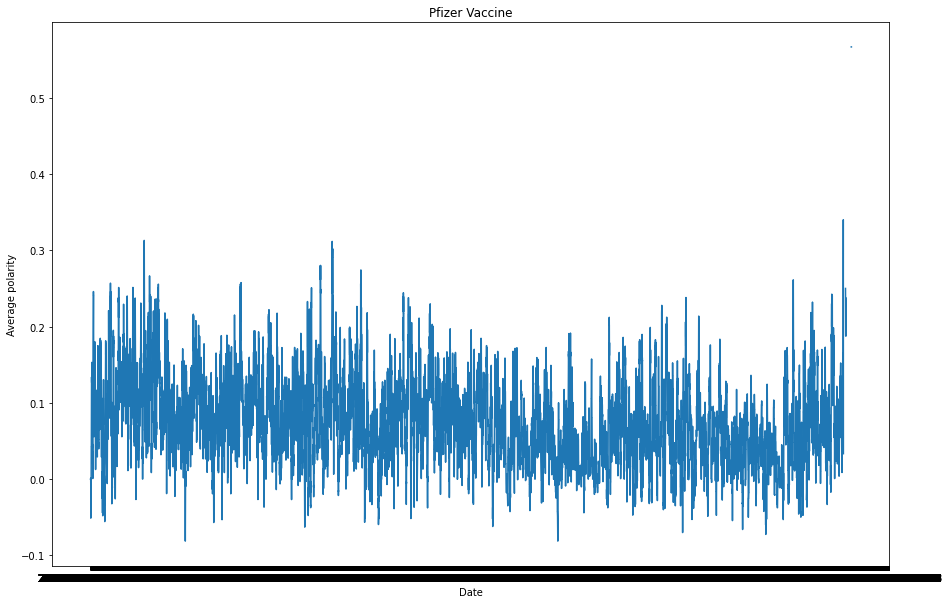

In [74]:
#creating line graphs -pfizer
plt.figure(figsize =(15 ,10))
plt.plot(pf['date'], pf['average polarity'])
plt.title('Pfizer Vaccine')
plt.xlabel('Date')
plt.ylabel('Average polarity')
plt.show()

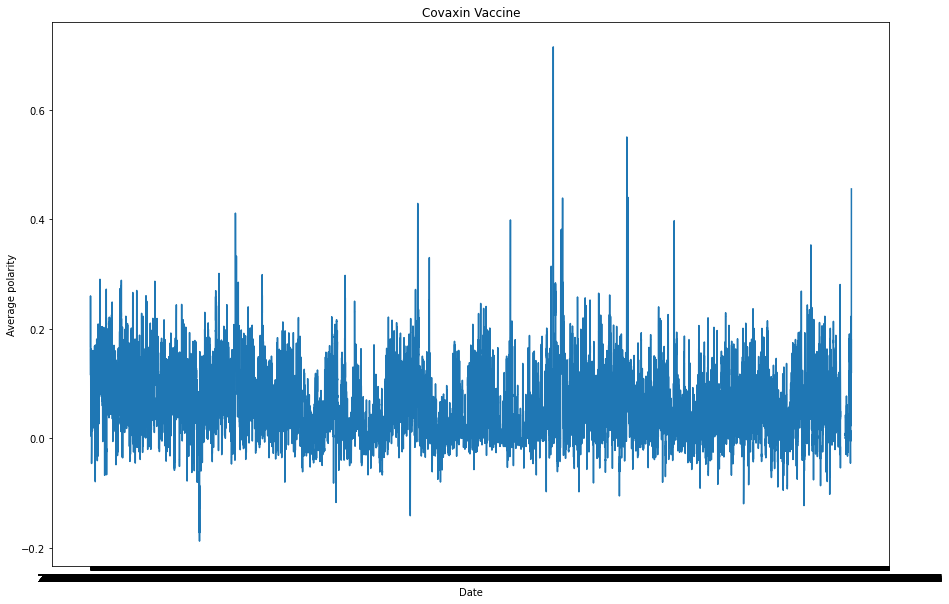

In [75]:
#creating line graphs -covaxin
plt.figure(figsize =(15 ,10))
plt.plot(c['date'], c['average polarity'])
plt.title('Covaxin Vaccine')
plt.xlabel('Date')
plt.ylabel('Average polarity')
plt.show()

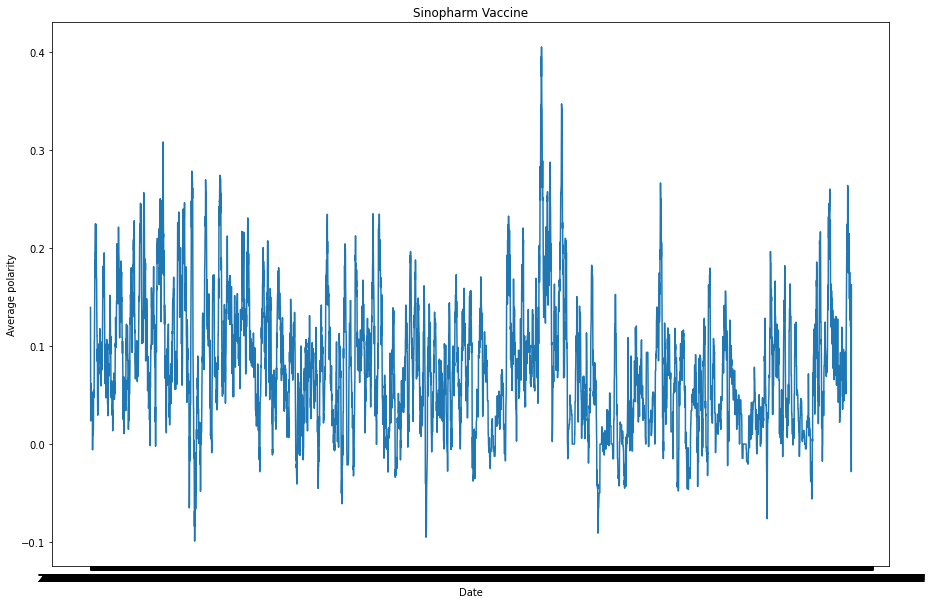

In [76]:
#creating line graphs -sinopharm
plt.figure(figsize =(15 ,10))
plt.plot(s['date'], s['average polarity'])
plt.title('Sinopharm Vaccine')
plt.xlabel('Date')
plt.ylabel('Average polarity')
plt.show()

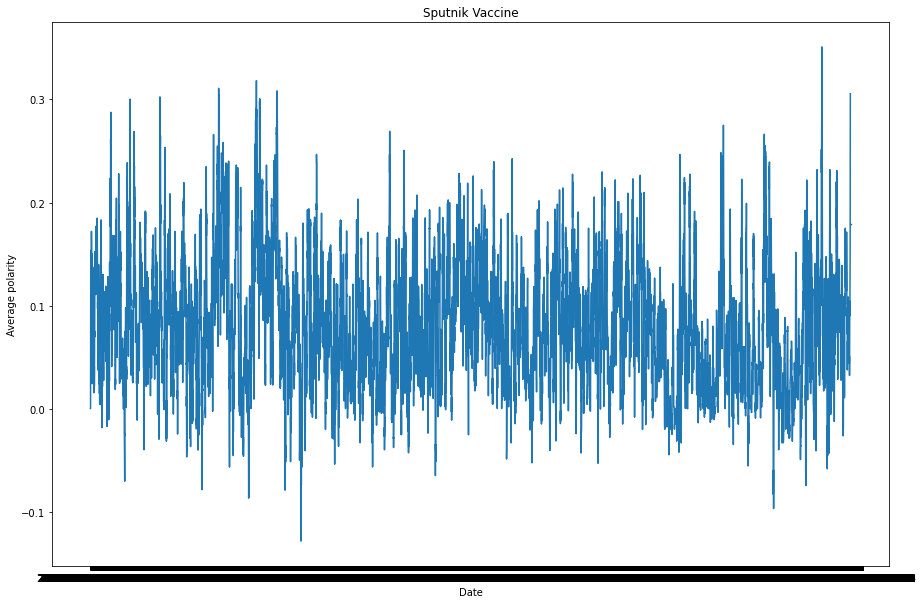

In [77]:
#creating line graphs - sputnik
plt.figure(figsize =(15 ,10))
plt.plot(sp['date'], sp['average polarity'])
plt.title('Sputnik Vaccine')
plt.xlabel('Date')
plt.ylabel('Average polarity')
plt.show()

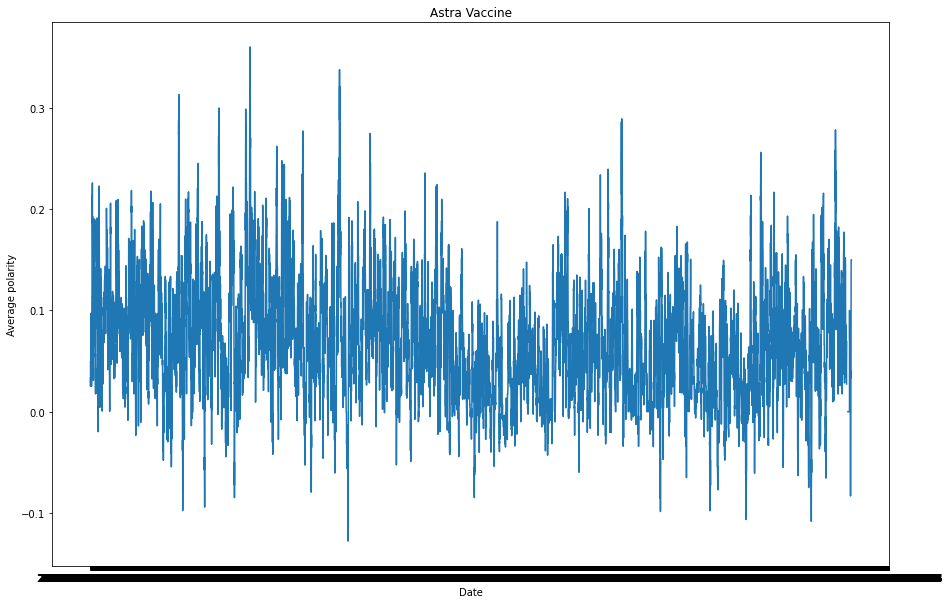

In [78]:
#creating line graphs -astra
plt.figure(figsize =(15 ,10))
plt.plot(a['date'], a['average polarity'])
plt.title('Astra Vaccine')
plt.xlabel('Date')
plt.ylabel('Average polarity')
plt.show()

In [79]:
#creating line graphs - moderna
plt.figure(figsize =(15 ,10))
plt.plot(mo['date'], mo['average polarity'])
plt.title('Moderna Vaccine')
plt.xlabel('Date')
plt.ylabel('Average polarity')
plt.show()

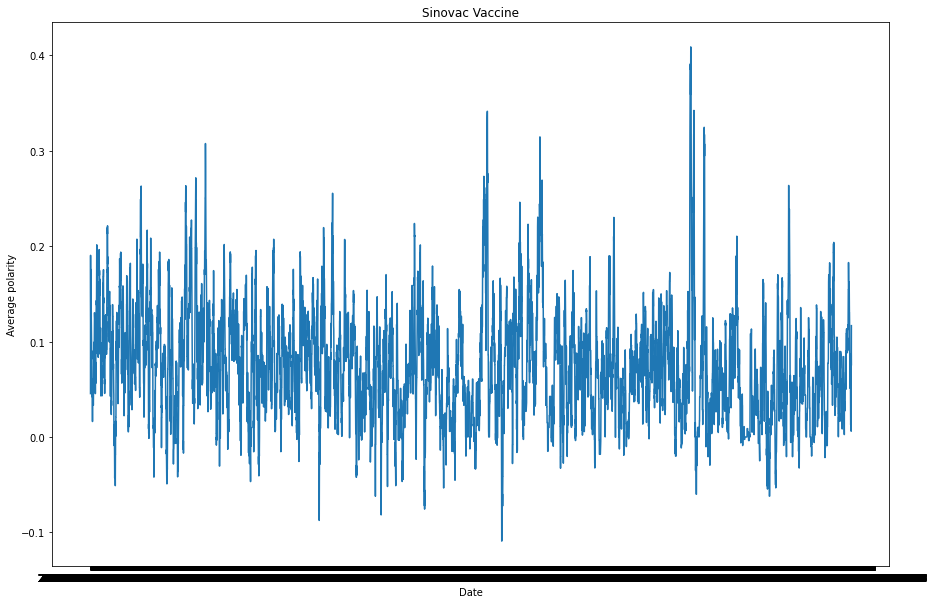

In [ ]:
#creating line graphs - sinovac
plt.figure(figsize =(15 ,10))
plt.plot(si['date'], si['average polarity'])
plt.title('Sinovac Vaccine')
plt.xlabel('Date')
plt.ylabel('Average polarity')
plt.show()

In [ ]:
#checking current columns
pf.columns

Index(['date', 'polarity', 'average polarity'], dtype='object')

In [ ]:
c.columns

Index(['date', 'polarity', 'average polarity'], dtype='object')

In [ ]:
pf['date'].head()

44    2020-12-12 11:55:28
42    2020-12-12 12:12:35
41    2020-12-12 12:16:14
40    2020-12-12 12:16:27
38    2020-12-12 12:19:56
Name: date, dtype: object

In [ ]:
# #getting overall sentiments for vaccines
# total_sentiments = pd.DataFrame()
# total_sentiments['date'] = sorted(updated_data2['date'].unique())
# sent_list = list()
# for i in total_sentiments['date']:
#     sent_list.append(updated_data2[updated_data2['date'] == i].polarity.mean())
# total_sentiments['sentiment'] = sent_list
# plt.figure(figsize =(15 ,10))
# plt.figure(total_sentiments['date'], total_sentiments['sentiment'])
# plt.title('Overall Vaccine Sentiment')
# plt.xlabel('Date')
# plt.ylabel('Sentiment')